<h1> SVM Regression </h1>

SVM Regression is another method to find the parameters of a line that best fits a set of data points that are assumed to have a linear correlation.

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression Programs (linear) - ML </h2>

In [3]:
import numpy as np

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for svm regression. The solutions use Quadratic Programming to solve for the model parameters.

LinearSVR and SVR can be used for svm regression.

In [14]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y.ravel())

print(svm_reg.intercept_, svm_reg.coef_)

[3.77392416] [2.86210636]


The solution we have for $\hat{\theta_{0}}$ and $\hat{\theta_{1}}$ are close enough to the values of 4 and 3.

We can use this solution for $\hat{\theta}$ to predict new values:
$ \hat{y} = 
  X\hat{\theta}
$

In [15]:
X_new = np.array([[0], [2]])

y_predict = svm_reg.predict(X_new)

print(y_predict)

[3.77392416 9.49813688]


We can plot a graph of the model's data and predictions:

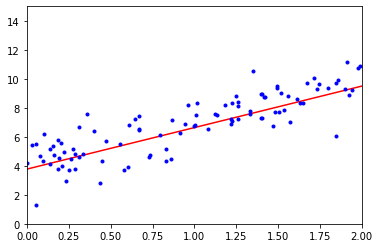

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear', epsilon=1.5)
svm_reg.fit(X, y.ravel())

print(svm_reg.intercept_, svm_reg.coef_)

[4.22907666] [[2.54378368]]


In [18]:
y_predict = svm_reg.predict(X_new)

print(y_predict)

[4.22907666 9.31664402]


We can plot a graph of the model's data and predictions:

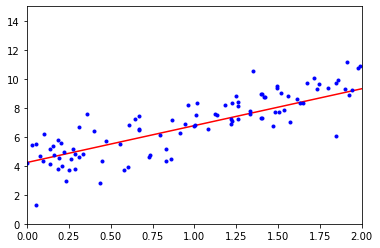

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [20]:
from sklearn.linear_model import SGDRegressor

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

# loss = espilon_insensitive uses support vector regression
# the default loss function is squared_loss
sgd_reg = SGDRegressor(loss="epsilon_insensitive", max_iter=n_epochs, tol=tol, penalty=None, eta0=eta)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.09873584] [2.95608482]


In [21]:
y_predict = sgd_reg.predict(X_new)

print(y_predict)

[ 4.09873584 10.01090548]


We can plot a graph of the model's data and predictions:

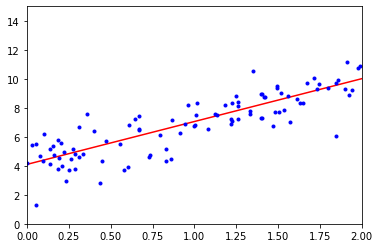

In [22]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression Programs (linear) Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>Batch GD</td>
      <td>SGD</td>
      <td>Mini-batch GD</td>
    </tr>
    <tr>
      <td>ML (Scikit-Learn)</td>
      <td>Yes (LinearSVR or SVR class with kernel = "linear")</td>
      <td>No</td> 
      <td>Yes (SGDRegressor class with loss = 'epsilon_insensitive')</td>
      <td>No</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression Programs (polynomial) - ML </h2>

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for svm regression for polynomial features. The solutions use Quadratic Programming to solve for the model parameters.

LinearSVR, SVR can be used for SVM regression with polynomial features.

In [23]:
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = 0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10

In [25]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

svm_reg = LinearSVR(epsilon=0.2)
svm_reg.fit(X_poly, y.ravel())

LinearSVR(epsilon=0.2)

In [ ]:
X_new = np.linspace(-1, 1, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)

y_predict = svm_reg.predict(X_new_poly)

print(y_predict)

We can plot a graph of the model's data and predictions:

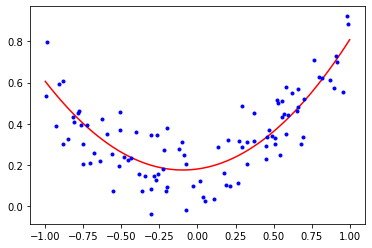

In [27]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [28]:
from sklearn.svm import SVR

# if you're using SVR with kernel ="poly", then you don't need to transform X
# using PolynomialFeatures, this will do it under the hood using the degree of the polynomial
# that you specify as input
svm_reg = SVR(kernel='poly', degree=2, epsilon=0.1)
svm_reg.fit(X, y.ravel())

SVR(degree=2, kernel='poly')

In [ ]:
y_predict = svm_reg.predict(X_new)

print(y_predict)

We can plot a graph of the model's data and predictions:

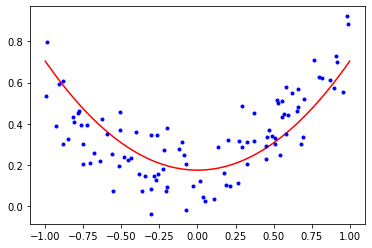

In [30]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [31]:
from sklearn.linear_model import SGDRegressor

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

# loss = espilon_insensitive uses support vector regression
# the default loss function is squared_loss
sgd_reg = SGDRegressor(loss="epsilon_insensitive", max_iter=n_epochs, tol=tol, penalty=None, eta0=eta)
sgd_reg.fit(X_poly, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[0.20934864] [0.13725396 0.54210579]


In [ ]:
y_predict = sgd_reg.predict(X_new_poly)

print(y_predict)

We can plot a graph of the model's data and predictions:

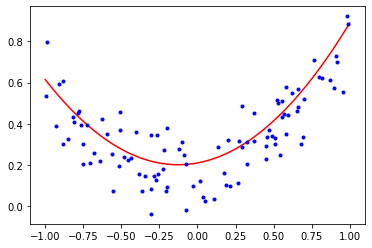

In [33]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()


<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression Programs (polynomial) Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>Batch GD</td>
      <td>SGD</td>
      <td>Mini-batch GD</td>
    </tr>
    <tr>
      <td>ML (Scikit-Learn)</td>
      <td>Yes (LinearSVR class with polynomial features, SVR class with kernel = "poly")</td>
      <td>No</td> 
      <td>Yes (SGDRegressor class with loss = 'epsilon_insensitive' and polynomial features)</td>
      <td>No</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression - Regularization </h2>

<b> Closed form </b>

We can use Scikit-Learn SVM regression methods to solve closed form solutions with regularization parameter (C).

In [40]:
from sklearn.svm import LinearSVR

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

svm_reg = LinearSVR(C=20, epsilon=1.5)
svm_reg.fit(X, y.ravel())

X_new = [[0], [.5], [1], [1.5], [2]]
y_predict = svm_reg.predict(X_new)

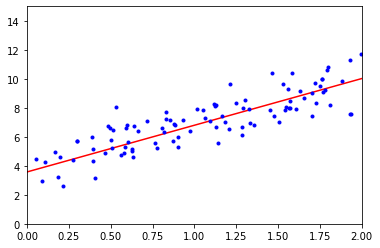

In [41]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [42]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear', C=20, epsilon=1.5)
svm_reg.fit(X, y.ravel())

y_predict = svm_reg.predict(X_new)

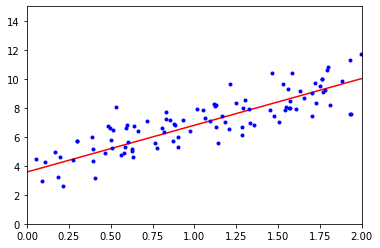

In [43]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [44]:
from sklearn.linear_model import SGDRegressor

# hyperparameters
eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
alpha = 1/(m * 20) # alpha regularization coefficient, 1/(m * C)

sgd_reg = SGDRegressor(loss="epsilon_insensitive", 
                        max_iter=n_epochs, tol=tol, eta0=eta, alpha=alpha)
sgd_reg.fit(X, y.ravel())

y_predict = sgd_reg.predict(X_new)

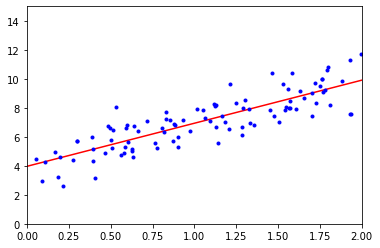

In [45]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> SVM Regression (polynomial) - Regularization </h2>

<b> Closed form </b>

We can use Scikit-Learn SVM regression methods to solve closed form solutions with regularization parameter (C).

In [68]:
from sklearn.svm import LinearSVR

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = 0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10

X_poly = poly_features.fit_transform(X)

svm_reg = LinearSVR(C=15, epsilon=0.2, max_iter=1500)
svm_reg.fit(X_poly, y.ravel())

X_new = np.linspace(-1, 1, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_predict = svm_reg.predict(X_new_poly)

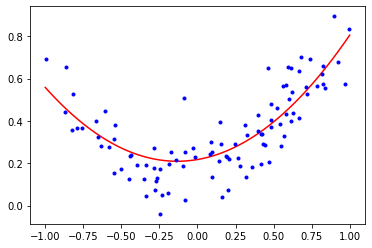

In [69]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [73]:
# if you're using SVR with kernel ="poly", then you don't need to transform X
# using PolynomialFeatures, this will do it under the hood using the degree of the polynomial
# that you specify as input
svm_reg = SVR(kernel='poly', degree=2, C=20, epsilon=0.1)
svm_reg.fit(X, y.ravel())

y_predict = svm_reg.predict(X_new)

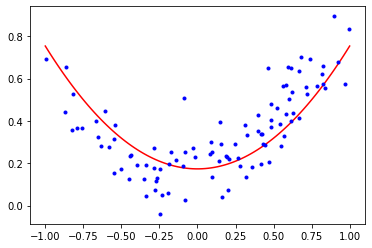

In [74]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [75]:
from sklearn.linear_model import SGDRegressor

# hyperparameters
eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
alpha = 1/(m * 20) # alpha regularization coefficient, 1/(m * C)

sgd_reg = SGDRegressor(loss="epsilon_insensitive", 
                        max_iter=n_epochs, tol=tol, eta0=eta, alpha=alpha)
sgd_reg.fit(X_poly, y.ravel())

y_predict = sgd_reg.predict(X_new_poly)

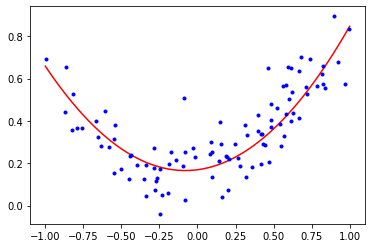

In [76]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> Regularization Regression Programs Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="1">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>SVM Regression (Scikit-Learn)</td>
      <td>Yes (LinearSVR with C parameter or SVR class with kernel = "linear" and C parameter)</td> 
      <td>Yes (SGDRegressor with alpha = 1/(m * C))</td> 
    </tr>
    <tr>
      <td>SVM Regression (polynomial) (Scikit-Learn)</td>
      <td>Yes (LinearSVR with polynomial features and C parameter or SVR class with kernel = "poly" and C parameter)</td> 
      <td>Yes (SGDRegressor with alpha = 1/(m * C) and Polynomial features)</td> 
    </tr>
  </tbody>  
</table>